In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import RandomizedSearchCVa
pd.set_option('display.float_format', lambda x: '%0.3f' % x)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('new_sold_data_for_cv_tpx_17may.csv',usecols=('SOLD_DATE','MAKEYEAR','CLEANEDMake','CLEANEDModel','CLEANEDVariant','CLEANEDfueltype','SOLDAMOUNT','STATE_MAPPED','METERREADING'))

In [3]:
df.head()

,SOLD_DATE,MAKEYEAR,CLEANEDMake,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,SOLDAMOUNT,STATE_MAPPED,METERREADING
0,12-01-2023,2011,AMW,2518,6X2CARGOTRUCK,DIESEL,375000,BIHAR,219700
1,10-02-2023,2010,AMW,2518,6X2CARGOTRUCK,DIESEL,485000,MAHARASHTRA,239400
2,07-01-2023,2013,AMW,2528TP,6X4TIPPER,DIESEL,288000,RAJASTHAN,182900
3,28-01-2023,2018,ASHOKLEYLAND,3118IL,8X2REFRIGERATEDTRUCK,DIESEL,1000000,HARYANA,92650
4,11-01-2023,2014,ASHOKLEYLAND,12M,4X2BUS,DIESEL,483000,MAHARASHTRA,164850


In [4]:
df['SOLD_DATE']

0        12-01-2023
1        10-02-2023
2        07-01-2023
3        28-01-2023
4        11-01-2023
            ...    
12222    15-03-2023
12223    26-04-2023
12224    20-03-2023
12225    10-05-2023
12226    17-03-2023
Name: SOLD_DATE, Length: 12227, dtype: object

In [5]:
from datetime import datetime


In [6]:
date_objects = df['SOLD_DATE'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))
print(date_objects)

0       2023-01-12
1       2023-02-10
2       2023-01-07
3       2023-01-28
4       2023-01-11
           ...    
12222   2023-03-15
12223   2023-04-26
12224   2023-03-20
12225   2023-05-10
12226   2023-03-17
Name: SOLD_DATE, Length: 12227, dtype: datetime64[ns]


In [7]:
df['SOLD_DATE']=date_objects

In [8]:
df['SOLD_DATE']

0       2023-01-12
1       2023-02-10
2       2023-01-07
3       2023-01-28
4       2023-01-11
           ...    
12222   2023-03-15
12223   2023-04-26
12224   2023-03-20
12225   2023-05-10
12226   2023-03-17
Name: SOLD_DATE, Length: 12227, dtype: datetime64[ns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SOLD_DATE        12227 non-null  datetime64[ns]
 1   MAKEYEAR         12227 non-null  int64         
 2   CLEANEDMake      12227 non-null  object        
 3   CLEANEDModel     12227 non-null  object        
 4   CLEANEDVariant   12227 non-null  object        
 5   CLEANEDfueltype  12227 non-null  object        
 6   SOLDAMOUNT       12227 non-null  int64         
 7   STATE_MAPPED     12227 non-null  object        
 8   METERREADING     12227 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 859.8+ KB


In [10]:
df.SOLD_DATE=pd.to_datetime(df.SOLD_DATE)

In [11]:
df["SOLD_Year"] = df.SOLD_DATE.dt.year

In [12]:
df["SOLD_Month"] = df.SOLD_DATE.dt.month

In [13]:
df["SOLD_Day"] = df.SOLD_DATE.dt.day

In [14]:
df

,SOLD_DATE,MAKEYEAR,CLEANEDMake,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,SOLDAMOUNT,STATE_MAPPED,METERREADING,SOLD_Year,SOLD_Month,SOLD_Day
0,2023-01-12,2011,AMW,2518,6X2CARGOTRUCK,DIESEL,375000,BIHAR,219700,2023,1,12
1,2023-02-10,2010,AMW,2518,6X2CARGOTRUCK,DIESEL,485000,MAHARASHTRA,239400,2023,2,10
2,2023-01-07,2013,AMW,2528TP,6X4TIPPER,DIESEL,288000,RAJASTHAN,182900,2023,1,7
3,2023-01-28,2018,ASHOKLEYLAND,3118IL,8X2REFRIGERATEDTRUCK,DIESEL,1000000,HARYANA,92650,2023,1,28
4,2023-01-11,2014,ASHOKLEYLAND,12M,4X2BUS,DIESEL,483000,MAHARASHTRA,164850,2023,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...
12222,2023-03-15,2013,TATA,LPT2518,6X2CARGOTRUCK,DIESEL,550000,BIHAR,186250,2023,3,15
12223,2023-04-26,2015,TATA,LP912,4X2BUS,DIESEL,350000,UTTARPRADESH,151850,2023,4,26
12224,2023-03-20,2012,MAHINDRA,MAXXIMO,4X2MINIBUS,DIESEL,74000,MAHARASHTRA,204800,2023,3,20
12225,2023-05-10,2021,MAHINDRA,JEETO,4X2PICKUP,CNG,223000,MAHARASHTRA,40288,2023,5,10


In [15]:
df["CV_Age"] = df["SOLD_Year"] - df['MAKEYEAR']

In [16]:
df.head()

,SOLD_DATE,MAKEYEAR,CLEANEDMake,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,SOLDAMOUNT,STATE_MAPPED,METERREADING,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2023-01-12,2011,AMW,2518,6X2CARGOTRUCK,DIESEL,375000,BIHAR,219700,2023,1,12,12
1,2023-02-10,2010,AMW,2518,6X2CARGOTRUCK,DIESEL,485000,MAHARASHTRA,239400,2023,2,10,13
2,2023-01-07,2013,AMW,2528TP,6X4TIPPER,DIESEL,288000,RAJASTHAN,182900,2023,1,7,10
3,2023-01-28,2018,ASHOKLEYLAND,3118IL,8X2REFRIGERATEDTRUCK,DIESEL,1000000,HARYANA,92650,2023,1,28,5
4,2023-01-11,2014,ASHOKLEYLAND,12M,4X2BUS,DIESEL,483000,MAHARASHTRA,164850,2023,1,11,9


In [17]:
# df['SOLD_DATE']=df['SOLD_DATE'].astype(int)

In [18]:
df.shape

(12227, 13)

In [19]:
df.rename(columns={'CLEANEDMake':'Make_Clean','METERREADING':'Meter_Reading'},inplace=True)

In [20]:
df.columns=[c.replace(" ","_")for c in df.columns]

In [21]:
df.head()

,SOLD_DATE,MAKEYEAR,Make_Clean,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,SOLDAMOUNT,STATE_MAPPED,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2023-01-12,2011,AMW,2518,6X2CARGOTRUCK,DIESEL,375000,BIHAR,219700,2023,1,12,12
1,2023-02-10,2010,AMW,2518,6X2CARGOTRUCK,DIESEL,485000,MAHARASHTRA,239400,2023,2,10,13
2,2023-01-07,2013,AMW,2528TP,6X4TIPPER,DIESEL,288000,RAJASTHAN,182900,2023,1,7,10
3,2023-01-28,2018,ASHOKLEYLAND,3118IL,8X2REFRIGERATEDTRUCK,DIESEL,1000000,HARYANA,92650,2023,1,28,5
4,2023-01-11,2014,ASHOKLEYLAND,12M,4X2BUS,DIESEL,483000,MAHARASHTRA,164850,2023,1,11,9


In [22]:
df.columns

Index(['SOLD_DATE', 'MAKEYEAR', 'Make_Clean', 'CLEANEDModel', 'CLEANEDVariant',
       'CLEANEDfueltype', 'SOLDAMOUNT', 'STATE_MAPPED', 'Meter_Reading',
       'SOLD_Year', 'SOLD_Month', 'SOLD_Day', 'CV_Age'],
      dtype='object')

In [23]:
df.shape

(12227, 13)

In [24]:
df.isnull().sum()

SOLD_DATE          0
MAKEYEAR           0
Make_Clean         0
CLEANEDModel       0
CLEANEDVariant     0
CLEANEDfueltype    0
SOLDAMOUNT         0
STATE_MAPPED       0
Meter_Reading      0
SOLD_Year          0
SOLD_Month         0
SOLD_Day           0
CV_Age             0
dtype: int64

In [25]:
df.describe()

,MAKEYEAR,SOLDAMOUNT,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
count,12227.000,12227.000,12227.000,12227.000,12227.000,12227.000,12227.000
mean,2014.980,364573.928,149815.871,2022.883,3.145,17.908,7.903
std,4.328,386297.399,129207.235,0.322,2.168,7.539,4.392
min,1989.000,5000.000,349.000,2022.000,1.000,1.000,0.000
25%,2012.000,130000.000,75400.000,2023.000,2.000,12.000,4.000
50%,2016.000,250000.000,128950.000,2023.000,3.000,18.000,7.000
75%,2018.000,426050.000,204900.000,2023.000,4.000,25.000,11.000
max,2022.000,4500000.000,4987687.000,2023.000,12.000,31.000,34.000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12227 entries, 0 to 12226
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SOLD_DATE        12227 non-null  datetime64[ns]
 1   MAKEYEAR         12227 non-null  int64         
 2   Make_Clean       12227 non-null  object        
 3   CLEANEDModel     12227 non-null  object        
 4   CLEANEDVariant   12227 non-null  object        
 5   CLEANEDfueltype  12227 non-null  object        
 6   SOLDAMOUNT       12227 non-null  int64         
 7   STATE_MAPPED     12227 non-null  object        
 8   Meter_Reading    12227 non-null  int64         
 9   SOLD_Year        12227 non-null  int64         
 10  SOLD_Month       12227 non-null  int64         
 11  SOLD_Day         12227 non-null  int64         
 12  CV_Age           12227 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 1.2+ MB


In [27]:
df['STATE_MAPPED'].value_counts()

TAMILNADU          1633
MAHARASHTRA        1502
WESTBENGAL         1176
UTTARPRADESH        895
TELANGANA           741
ANDHRAPRADESH       724
ASSAM               672
KARNATAKA           669
MADHYAPRADESH       536
RAJASTHAN           424
BIHAR               417
GUJARAT             411
ODISHA              406
KERALA              371
UTTARAKHAND         338
HARYANA             261
JHARKHAND           246
HIMACHALPRADESH     185
DELHI               184
CHHATTISGARH        173
PUNJAB              155
JAMMU&KASHMIR        53
CHANDIGARH           38
NAGALAND             15
PUDUCHERRY            2
Name: STATE_MAPPED, dtype: int64

In [28]:
#df['STATE_MAPPED'].replace({'Rajasthan':'RAJASTHAN','Gujarat':'GUJARAT','Punjab':'PUNJAB','Haryana':'HARYANA','Jharkhand':'JHARKHAND','Assam':'ASSAM','Kerala':'KERALA','Telangana':'TELANGANA','Bihar':'BIHAR','Uttarakhand':'UTTARAKHAND','Maharashtra':'MAHARASHTRA','Delhi':'DELHI'},inplace = True)

In [29]:
df['Make_Clean'].value_counts()

TATA            7476
MAHINDRA        1830
ASHOKLEYLAND    1715
EICHER           606
FORCE            204
MARUTI           103
BHARATBENZ        97
SWARAJMAZDA       67
Eicher            53
SMLISUZU          28
PIAGGIO           16
AMW               10
SCANIA             6
FORCEMAN           5
Mahindra           3
BAJAJTEMPO         3
VOLVO              2
PREMIER            2
ATUL               1
Name: Make_Clean, dtype: int64

In [30]:
df['Make_Clean'].replace({'Mahindra':'MAHINDRA','Eicher':'EICHER'},inplace = True)

In [31]:
df['Make_Clean'].value_counts()

TATA            7476
MAHINDRA        1833
ASHOKLEYLAND    1715
EICHER           659
FORCE            204
MARUTI           103
BHARATBENZ        97
SWARAJMAZDA       67
SMLISUZU          28
PIAGGIO           16
AMW               10
SCANIA             6
FORCEMAN           5
BAJAJTEMPO         3
VOLVO              2
PREMIER            2
ATUL               1
Name: Make_Clean, dtype: int64

In [32]:
#df['SELLER_SEGMENT'].value_counts()

In [33]:
#df['SELLER_SEGMENT'].replace({'Insurance':'INSURANCE'},inplace = True)

In [34]:
#df['SELLER_SEGMENT'].value_counts()

In [35]:
df.to_csv('New_CV_Data_12k_NCS.csv')

In [36]:
df1 = pd.read_csv('Latest_CV_DATA(2).csv',encoding='latin-1',usecols=('SOLD_DATE','MAKEYEAR','Make_Clean','CLEANEDModel','CLEANEDVariant','CLEANEDfueltype','SOLDAMOUNT','STATE_MAPPED','Meter_Reading'))

In [37]:
df1.shape

(403890, 9)

In [38]:
df1.head()

,SOLD_DATE,MAKEYEAR,Make_Clean,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,SOLDAMOUNT,STATE_MAPPED,Meter_Reading
0,26-11-2020,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,445000,GUJARAT,490620.000
1,09-11-2021,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,315000,TAMILNADU,736100.000
2,01-01-2022,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,231646,MADHYAPRADESH,1112310.000
3,01-01-2021,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,BIHAR,1050260.000
4,01-01-2022,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,HARYANA,1050260.000


In [39]:
df1.SOLD_DATE=pd.to_datetime(df1.SOLD_DATE)

In [40]:
df1["SOLD_Year"] = df1.SOLD_DATE.dt.year

In [41]:
df1["SOLD_Month"] = df1.SOLD_DATE.dt.month

In [42]:
df1["SOLD_Day"] = df1.SOLD_DATE.dt.day

In [43]:
df1["CV_Age"] = df1["SOLD_Year"] - df1['MAKEYEAR']

In [44]:
df1.head()

,SOLD_DATE,MAKEYEAR,Make_Clean,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,SOLDAMOUNT,STATE_MAPPED,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,445000,GUJARAT,490620.000,2020,11,26,7
1,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,315000,TAMILNADU,736100.000,2021,9,11,11
2,2022-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,231646,MADHYAPRADESH,1112310.000,2022,1,1,17
3,2021-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,BIHAR,1050260.000,2021,1,1,16
4,2022-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,HARYANA,1050260.000,2022,1,1,16


In [45]:
df1['SOLD_Year'].value_counts()

2022    49157
2019    45287
2021    45150
2017    44170
2018    43129
2020    43125
2016    37917
2015    30655
2013    28463
2014    25802
2012    11035
Name: SOLD_Year, dtype: int64

In [46]:
df1.columns=[c.replace(" ","_")for c in df1.columns]

In [47]:
df.columns

Index(['SOLD_DATE', 'MAKEYEAR', 'Make_Clean', 'CLEANEDModel', 'CLEANEDVariant',
       'CLEANEDfueltype', 'SOLDAMOUNT', 'STATE_MAPPED', 'Meter_Reading',
       'SOLD_Year', 'SOLD_Month', 'SOLD_Day', 'CV_Age'],
      dtype='object')

In [48]:
df1.shape

(403890, 13)

In [49]:
df3 = pd.concat([df1, df], axis=0)


In [50]:
df3.head()

,SOLD_DATE,MAKEYEAR,Make_Clean,CLEANEDModel,CLEANEDVariant,CLEANEDfueltype,SOLDAMOUNT,STATE_MAPPED,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,445000,GUJARAT,490620.000,2020,11,26,7
1,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,315000,TAMILNADU,736100.000,2021,9,11,11
2,2022-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,231646,MADHYAPRADESH,1112310.000,2022,1,1,17
3,2021-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,BIHAR,1050260.000,2021,1,1,16
4,2022-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,HARYANA,1050260.000,2022,1,1,16


In [51]:
df3.shape

(416117, 13)

In [52]:
#df3.drop(['SOLD_DATE','SOLD_Day'],axis=1,inplace=True)

In [53]:
df3.isnull().sum()

SOLD_DATE           0
MAKEYEAR            0
Make_Clean          0
CLEANEDModel        0
CLEANEDVariant      0
CLEANEDfueltype     0
SOLDAMOUNT          0
STATE_MAPPED        0
Meter_Reading      23
SOLD_Year           0
SOLD_Month          0
SOLD_Day            0
CV_Age              0
dtype: int64

In [54]:
df4=df3.dropna()

In [55]:
df4.isnull().sum()

SOLD_DATE          0
MAKEYEAR           0
Make_Clean         0
CLEANEDModel       0
CLEANEDVariant     0
CLEANEDfueltype    0
SOLDAMOUNT         0
STATE_MAPPED       0
Meter_Reading      0
SOLD_Year          0
SOLD_Month         0
SOLD_Day           0
CV_Age             0
dtype: int64

In [56]:
def uppper(df,col):
    df[col]=df[col].str.upper()
    df[col]=df[col].str.replace(' ','')
    return df[col]

In [57]:
def encoding(df4,col,col_1,model):
    print(model.head())
    temp = pd.read_csv(df4+'.csv',encoding='CP1252')
    temp[col]=uppper(temp,col)
    model_temp = pd.DataFrame()
    labels_temp_map = dict(zip(temp[col],temp['Id (Encoding)']))
    model_temp[col_1] = model[col_1].map(labels_temp_map)
    print(model.head())
    return model_temp[col_1]

In [58]:
def df_reset(df):
    return pd.DataFrame()

In [59]:
df4.rename(columns={'CLEANEDfueltype':'Fuel_Clean'},inplace=True)
df4.rename(columns={'STATE_MAPPED':'CV_State_Clean'},inplace=True)
df4.rename(columns={'CLEANEDModel':'Model_Clean'},inplace=True)
df4.rename(columns={'CLEANEDVariant':'Variant_Clean'},inplace=True)

In [60]:
df4.head()

,SOLD_DATE,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age
0,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,445000,GUJARAT,490620.000,2020,11,26,7
1,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,315000,TAMILNADU,736100.000,2021,9,11,11
2,2022-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,231646,MADHYAPRADESH,1112310.000,2022,1,1,17
3,2021-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,BIHAR,1050260.000,2021,1,1,16
4,2022-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,HARYANA,1050260.000,2022,1,1,16


In [61]:
df4['SOLD_Year'].value_counts()

2022    50586
2019    45284
2021    45143
2017    44168
2018    43126
2020    43121
2016    37917
2015    30655
2013    28463
2014    25801
2012    11035
2023    10795
Name: SOLD_Year, dtype: int64

In [62]:
df4['Make_Clean']=uppper(df4,'Make_Clean')
df4['Model_Clean']=uppper(df4,'Model_Clean')
df4['Variant_Clean']=uppper(df4,'Variant_Clean')
df4['Fuel_Clean']=uppper(df4,'Fuel_Clean')
df4['CV_State_Clean']=uppper(df4,'CV_State_Clean')

In [63]:
df4.isnull().sum()

SOLD_DATE         0
MAKEYEAR          0
Make_Clean        0
Model_Clean       0
Variant_Clean     0
Fuel_Clean        0
SOLDAMOUNT        0
CV_State_Clean    0
Meter_Reading     0
SOLD_Year         0
SOLD_Month        0
SOLD_Day          0
CV_Age            0
dtype: int64

In [64]:
df4['MMV']= df4['Make_Clean']+'_'+df4['Model_Clean']+'_'+df4['Variant_Clean']

In [65]:
df4.head()

,SOLD_DATE,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age,MMV
0,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,445000,GUJARAT,490620.000,2020,11,26,7,AMW_2516HL_6X2CARGOTRUCK
1,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,315000,TAMILNADU,736100.000,2021,9,11,11,AMW_2516HL_6X2CARGOTRUCK
2,2022-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,231646,MADHYAPRADESH,1112310.000,2022,1,1,17,AMW_2516HL_6X2CARGOTRUCK
3,2021-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,BIHAR,1050260.000,2021,1,1,16,AMW_2516HL_6X2CARGOTRUCK
4,2022-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,HARYANA,1050260.000,2022,1,1,16,AMW_2516HL_6X2CARGOTRUCK


In [66]:
df4['Make_Clean'].value_counts()

TATA            227172
ASHOKLEYLAND     77809
EICHER           36897
MAHINDRA         35508
SMLISUZU          9112
FORCE             8106
SWARAJMAZDA       6141
PIAGGIO           4594
BHARATBENZ        3653
AMW               2481
FORCEMAN          1943
HINDUSTAN          672
MARUTISUZUKI       658
VOLVO              477
PREMIER            169
MITSUBISHI         128
ICML               128
MARUTI             113
TOYOTA             110
BAJAJTEMPO         106
SCANIA              42
DECANAUTO           36
URAL                36
FUEL                 1
TRATEC               1
ATUL                 1
Name: Make_Clean, dtype: int64

In [67]:
df4.shape

(416094, 14)

In [68]:
df5 = df4[df4['MMV'].map(df4['MMV'].value_counts()) >=10]

In [69]:
df5.shape

(415679, 14)

In [70]:
df6 = df5[df5['MAKEYEAR']>=2005]

In [71]:
df6.shape

(384524, 14)

In [72]:
df6.head()

,SOLD_DATE,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age,MMV
0,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,445000,GUJARAT,490620.000,2020,11,26,7,AMW_2516HL_6X2CARGOTRUCK
1,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,315000,TAMILNADU,736100.000,2021,9,11,11,AMW_2516HL_6X2CARGOTRUCK
2,2022-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,231646,MADHYAPRADESH,1112310.000,2022,1,1,17,AMW_2516HL_6X2CARGOTRUCK
3,2021-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,BIHAR,1050260.000,2021,1,1,16,AMW_2516HL_6X2CARGOTRUCK
4,2022-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,HARYANA,1050260.000,2022,1,1,16,AMW_2516HL_6X2CARGOTRUCK


In [73]:
df6['SOLD_Year'].value_counts()

2022    48717
2021    43091
2019    42942
2020    40942
2017    40066
2018    40020
2016    33647
2015    27315
2013    24572
2014    23177
2023    10567
2012     9468
Name: SOLD_Year, dtype: int64

In [74]:
df7 = df6[df6["CV_Age"]>=0]

In [75]:
df7.shape

(384358, 14)

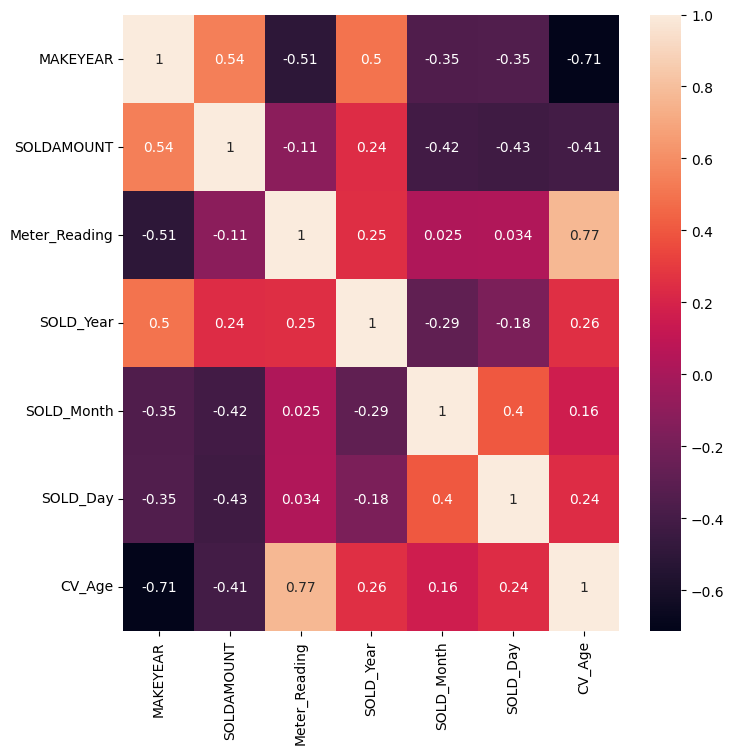

In [76]:
# Let's see the correlation matrix 
plt.figure(figsize = (8,8))        # Size of the figure
sns.heatmap(df7.corr(),annot = True)
plt.show()

In [77]:
df7.columns

Index(['SOLD_DATE', 'MAKEYEAR', 'Make_Clean', 'Model_Clean', 'Variant_Clean',
       'Fuel_Clean', 'SOLDAMOUNT', 'CV_State_Clean', 'Meter_Reading',
       'SOLD_Year', 'SOLD_Month', 'SOLD_Day', 'CV_Age', 'MMV'],
      dtype='object')

In [78]:
df7.reset_index(drop=True,inplace =True)

In [79]:
df7.shape

(384358, 14)

In [80]:
#df7['SELLER_SEGMENT'].value_counts()

In [81]:
df7['CV_State_Clean'].value_counts()

TAMILNADU              66501
ANDHRAPRADESH          65814
KARNATAKA              36462
MAHARASHTRA            24431
UTTARPRADESH           20528
MADHYAPRADESH          12164
GUJARAT                11749
RAJASTHAN              11457
CHANDIGARH             11429
KERALA                 11003
WESTBENGAL             10798
HARYANA                 7794
BIHAR                   6404
JHARKHAND               6223
ASSAM                   6197
HIMACHALPRADESH         5677
TELANGANA               5492
PUDUCHERRY              5276
ODISHA                  5245
UTTARAKHAND             4538
DELHI                   4489
PUNJAB                  4442
JAMMU&KASHMIR           4100
NAGALAND                3473
TRIPURA                 3300
DADRAANDNAGARHAVELI     3242
GOA                     3240
ARUNACHALPRADESH        3187
MIZORAM                 3172
MEGHALAYA               3169
SIKKIM                  3164
DAMANANDDIU             3159
LAKSHADWEEP             3150
MANIPUR                 3138
CHHATTISGARH  

In [82]:
Model_data = df7.copy()

In [83]:
Model_data.to_csv('NEW_CV_JAN_To_May_Model_data_final_CV_NCS.csv')

In [84]:
Model_data

,SOLD_DATE,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age,MMV
0,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,445000,GUJARAT,490620.000,2020,11,26,7,AMW_2516HL_6X2CARGOTRUCK
1,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,315000,TAMILNADU,736100.000,2021,9,11,11,AMW_2516HL_6X2CARGOTRUCK
2,2022-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,231646,MADHYAPRADESH,1112310.000,2022,1,1,17,AMW_2516HL_6X2CARGOTRUCK
3,2021-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,BIHAR,1050260.000,2021,1,1,16,AMW_2516HL_6X2CARGOTRUCK
4,2022-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,HARYANA,1050260.000,2022,1,1,16,AMW_2516HL_6X2CARGOTRUCK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384353,2023-03-15,2013,TATA,LPT2518,6X2CARGOTRUCK,DIESEL,550000,BIHAR,186250.000,2023,3,15,10,TATA_LPT2518_6X2CARGOTRUCK
384354,2023-04-26,2015,TATA,LP912,4X2BUS,DIESEL,350000,UTTARPRADESH,151850.000,2023,4,26,8,TATA_LP912_4X2BUS
384355,2023-03-20,2012,MAHINDRA,MAXXIMO,4X2MINIBUS,DIESEL,74000,MAHARASHTRA,204800.000,2023,3,20,11,MAHINDRA_MAXXIMO_4X2MINIBUS
384356,2023-05-10,2021,MAHINDRA,JEETO,4X2PICKUP,CNG,223000,MAHARASHTRA,40288.000,2023,5,10,2,MAHINDRA_JEETO_4X2PICKUP


In [85]:
Model_data_= Model_data[['MAKEYEAR','Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','Meter_Reading','SOLDAMOUNT']]

In [86]:
Model_data_.columns

Index(['MAKEYEAR', 'Make_Clean', 'Model_Clean', 'Variant_Clean', 'Fuel_Clean',
       'CV_State_Clean', 'Meter_Reading', 'SOLDAMOUNT'],
      dtype='object')

In [87]:
X=Model_data_.drop(['SOLDAMOUNT'],axis=1)
y=Model_data_[['SOLDAMOUNT']]

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [90]:
ohe=OneHotEncoder()
ohe.fit(X[['Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean']])

OneHotEncoder()

In [91]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean']),remainder='passthrough')

In [92]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['AMW', 'ASHOKLEYLAND', 'BAJAJTEMPO', 'BHARATBENZ', 'DECANAUTO',
       'EICHER', 'FORCE', 'FORCEMAN', 'HINDUSTAN', 'ICML', 'MAHINDRA',
       'MARUTI', 'MARUTISUZUKI', 'PIAGGIO', 'PREMIER', 'SCANIA',
       'SMLISUZU', 'SWARAJMAZDA', 'TATA', 'TOYOTA', 'URAL', 'VOLVO'],
      dtype=object),
                                                           arr...
       'JAMMU&KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA', 'LAKSHADWEEP',
       'MADHYAPRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUDUCHERRY', 'PUNJAB', 'RAJASTHAN',
       'SIKKIM', 'TAMILNADU', 'TELANGANA', 'TRIPURA', 'UTTARAKHAND',
       'UTTARPRADESH', 'WESTBENGAL'], dtype=object)]),
                                 ['Make_Clean', 'Model_Clean', 'Variant_Clean',
                                  'Fuel_Clean', 'CV_State_Clean'])])

In [93]:
from sklearn import model_selection
from xgboost import XGBRegressor

In [94]:
regressor=XGBRegressor(max_depth=15,learning_rate=0.01,
                   n_estimators=5000,
                   objective='reg:linear',
                   booster='gbtree')

In [95]:
pipe=make_pipeline(column_trans,regressor)

In [96]:
pipe.fit(X_train,y_train)

[17:31:01] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AMW', 'ASHOKLEYLAND', 'BAJAJTEMPO', 'BHARATBENZ', 'DECANAUTO',
       'EICHER', 'FORCE', 'FORCEMAN', 'HINDUSTAN', 'ICML', 'MAHINDRA',
       'MARUTI', 'MARUTISUZUKI', 'PIAGGIO', 'PREMIER', 'SCANIA',
       'SMLISUZU', 'SWARAJMAZDA', 'TATA', 'TOYO...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.01, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=15, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=5000, n_jobs=0, num_parallel_tree=1,
                              objective='reg:linear', predictor='auto',
                              random_state=0, reg_alpha=0, ...))])

In [97]:
y_pred=pipe.predict(X_test)
y_pred

array([  45415.58, 2071209.4 ,  100208.82, ...,   28201.47,  198344.03,
        401337.5 ], dtype=float32)

In [98]:
y_train_pred=pipe.predict(X_train)
y_train_pred

array([  78140.39 ,   62099.902, 1153051.4  , ...,   37678.86 ,
        803772.44 ,  146622.6  ], dtype=float32)

In [99]:
r2_score(y_train,y_train_pred)

0.9710678972399222

In [100]:
r2_score(y_test,y_pred)

0.9636827969229581

In [101]:
import pickle

In [102]:
pickle.dump(pipe,open('NEW_CV_JAN_To_May_Model_data_final_CV_NCS.pkl','wb'))

In [103]:
Model_data.head()

,SOLD_DATE,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,SOLDAMOUNT,CV_State_Clean,Meter_Reading,SOLD_Year,SOLD_Month,SOLD_Day,CV_Age,MMV
0,2020-11-26,2013,AMW,2516HL,6X2CARGOTRUCK,DIESEL,445000,GUJARAT,490620.000,2020,11,26,7,AMW_2516HL_6X2CARGOTRUCK
1,2021-09-11,2010,AMW,2516HL,6X2CARGOTRUCK,DIESEL,315000,TAMILNADU,736100.000,2021,9,11,11,AMW_2516HL_6X2CARGOTRUCK
2,2022-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,231646,MADHYAPRADESH,1112310.000,2022,1,1,17,AMW_2516HL_6X2CARGOTRUCK
3,2021-01-01,2005,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,BIHAR,1050260.000,2021,1,1,16,AMW_2516HL_6X2CARGOTRUCK
4,2022-01-01,2006,AMW,2516HL,6X2CARGOTRUCK,DIESEL,243837,HARYANA,1050260.000,2022,1,1,16,AMW_2516HL_6X2CARGOTRUCK


In [104]:
pipe.predict(pd.DataFrame(columns=['MAKEYEAR','Make_Clean','Model_Clean','Variant_Clean','Fuel_Clean','CV_State_Clean','Meter_Reading'],data=np.array([2013,'AMW','2516HL','6X2CARGOTRUCK','DIESEL','GUJARAT',490620.000]).reshape(1,7)))

array([384693.75], dtype=float32)

In [105]:
X_train_copy=X_train.copy()

In [106]:
X_train_copy['Predicted']=y_train_pred

In [107]:
X_train_copy['Actual']=y_train

In [108]:
X_train_copy['Predicted']

203237     78140.391
171182     62099.902
100154   1153051.375
270506     96052.742
303971    260037.984
             ...    
259178    124729.945
365838    128085.688
131932     37678.859
146867    803772.438
121958    146622.594
Name: Predicted, Length: 307486, dtype: float32

In [109]:
X_train_copy

,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,CV_State_Clean,Meter_Reading,Predicted,Actual
203237,2008,TATA,ACE,4X2PICKUP,DIESEL,TAMILNADU,179410.000,78140.391,105000
171182,2010,TATA,ACE,4X2PICKUP,DIESEL,RAJASTHAN,209440.000,62099.902,70000
100154,2020,EICHER,STARLINE50SCHOOL(11.12KCHASSIS),4X2SCHOOLBUS,DIESEL,WESTBENGAL,119000.000,1153051.375,1284957
270506,2012,TATA,ACEHT,4X2PICKUP,DIESEL,RAJASTHAN,181020.000,96052.742,145000
303971,2010,TATA,LPT2515,6X2CARGOTRUCK,DIESEL,UTTARPRADESH,760070.000,260037.984,295000
...,...,...,...,...,...,...,...,...,...
259178,2011,TATA,ACEHT,4X2PICKUP,DIESEL,KARNATAKA,303800.000,124729.945,135000
365838,2011,TATA,VENTUREEX,4X2MINIBUS,DIESEL,HARYANA,194820.000,128085.688,155000
131932,2010,MAHINDRA,GIO,4X2PICKUP,DIESEL,TAMILNADU,111650.000,37678.859,25000
146867,2019,SMLISUZU,COSMO2815WV26TC3COWL,4X2TANKERTRUCK,DIESEL,GOA,181050.000,803772.438,693458


In [110]:
X_train_copy.head(20)

,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,CV_State_Clean,Meter_Reading,Predicted,Actual
203237,2008,TATA,ACE,4X2PICKUP,DIESEL,TAMILNADU,179410.000,78140.391,105000
171182,2010,TATA,ACE,4X2PICKUP,DIESEL,RAJASTHAN,209440.000,62099.902,70000
100154,2020,EICHER,STARLINE50SCHOOL(11.12KCHASSIS),4X2SCHOOLBUS,DIESEL,WESTBENGAL,119000.000,1153051.375,1284957
270506,2012,TATA,ACEHT,4X2PICKUP,DIESEL,RAJASTHAN,181020.000,96052.742,145000
303971,2010,TATA,LPT2515,6X2CARGOTRUCK,DIESEL,UTTARPRADESH,760070.000,260037.984,295000
38766,2017,ASHOKLEYLAND,DOST,4X2PICKUP,DIESEL,ANDHRAPRADESH,75110.000,366382.812,468000
2833,2017,ASHOKLEYLAND,1112,4X4CARGOTRUCK,DIESEL,DADRAANDNAGARHAVELI,367200.000,780289.688,711000
178166,2008,TATA,ACE,4X2PICKUP,DIESEL,TAMILNADU,280700.000,67147.297,100000
275453,2017,TATA,ACEMEGA,4X2PICKUP,DIESEL,UTTARPRADESH,69370.000,188741.234,175000
94414,2015,EICHER,PRO2049CBC10FTPSBS6,4X2CONTAINERIZEDTRUCK,DIESEL,BIHAR,367370.000,590880.125,533465


In [111]:
MAPE=abs((X_train_copy['Actual']-X_train_copy['Predicted'])/X_train_copy['Actual']).mean()*100

In [112]:
MAPE

35.230813104243964

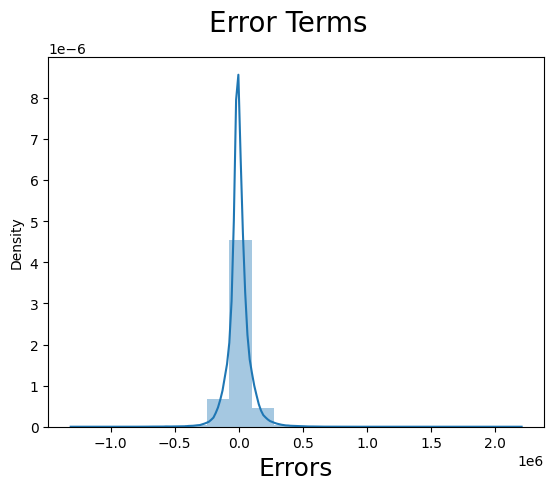

In [113]:
# Plot the histogram of the error terms
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.distplot((X_train_copy['Actual'] - X_train_copy['Predicted']), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

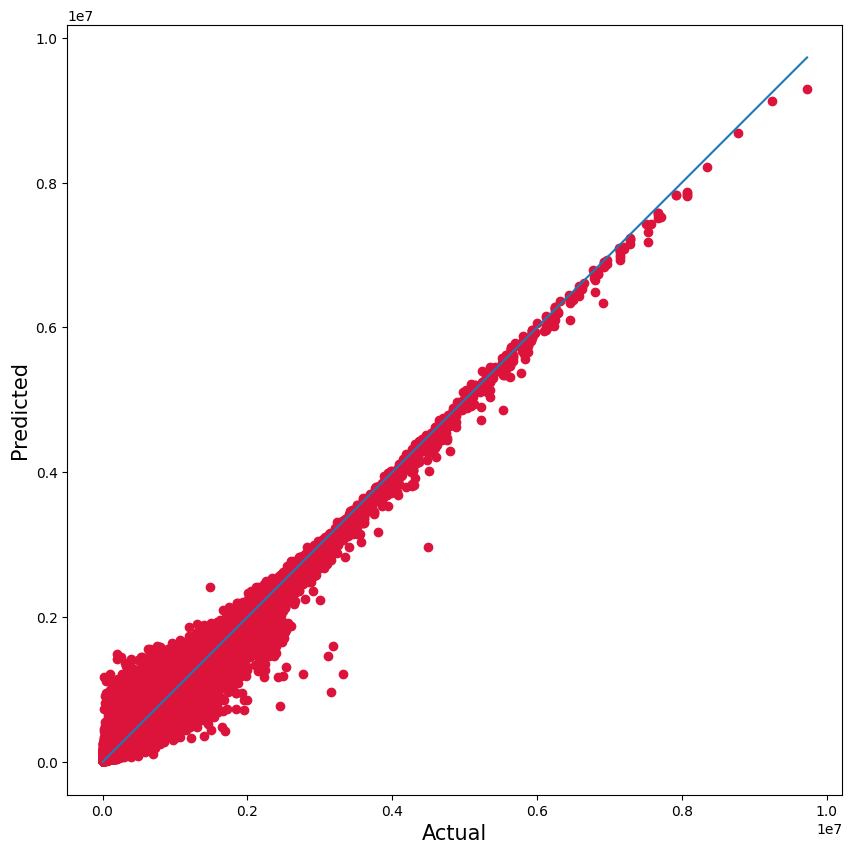

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(X_train_copy['Actual'], X_train_copy['Predicted'], c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(X_train_copy['Predicted']), max(X_train_copy['Actual']))
p2 = min(min(X_train_copy['Predicted']), min(X_train_copy['Actual']))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.show()

In [115]:
X_test_copy=X_test.copy()
X_test_copy['Predicted']=y_pred
X_test_copy['Actual']=y_test


In [116]:
X_test_copy['Predicted']

237224     45415.578
66769    2071209.375
270532    100208.820
89107    1181669.125
175362     93318.672
             ...    
347926    230810.078
205051    129187.477
246714     28201.471
35721     198344.031
313835    401337.500
Name: Predicted, Length: 76872, dtype: float32

In [117]:
X_test_copy.head(20)

,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,CV_State_Clean,Meter_Reading,Predicted,Actual
237224,2008,TATA,ACE,4X2PICKUP,DIESEL,DELHI,338590.000,45415.578,20000
66769,2017,BHARATBENZ,3123,8X2TANKERTRUCK,DIESEL,CHANDIGARH,180880.000,2071209.375,2056603
270532,2012,TATA,ACEHT,4X2PICKUP,DIESEL,KARNATAKA,182140.000,100208.820,130000
89107,2015,EICHER,HERCULES35.31,8X2CARGOTRUCK,DIESEL,TAMILNADU,181050.000,1181669.125,1317221
175362,2009,TATA,ACE,4X2PICKUP,DIESEL,TAMILNADU,238350.000,93318.672,90000
377819,2020,ASHOKLEYLAND,GG3520-5750WB24LSBS6,8X2CARGOTRUCK,DIESEL,ODISHA,50850.000,1669668.750,1453000
247768,2011,TATA,ACE,4X2PICKUP,DIESEL,TAMILNADU,229180.000,103592.875,76000
168279,2009,TATA,ACE,4X2PICKUP,DIESEL,TAMILNADU,95340.000,186125.578,185000
174103,2009,TATA,ACE,4X2PICKUP,DIESEL,KARNATAKA,208180.000,76029.438,85000
87705,2012,EICHER,30.25GALAXY,6X2CARGOTRUCK,DIESEL,UTTARPRADESH,244290.000,311447.125,200000


In [118]:
vertical_concat = pd.concat([X_train_copy,X_test_copy ], axis=0)

In [119]:
vertical_concat['Diffrence']=vertical_concat['Predicted']-vertical_concat['Actual']

In [120]:
vertical_concat['%_diff']=((vertical_concat['Diffrence']/vertical_concat['Actual'])*100)

In [121]:
vertical_concat

,MAKEYEAR,Make_Clean,Model_Clean,Variant_Clean,Fuel_Clean,CV_State_Clean,Meter_Reading,Predicted,Actual,Diffrence,%_diff
203237,2008,TATA,ACE,4X2PICKUP,DIESEL,TAMILNADU,179410.000,78140.391,105000,-26859.609,-25.581
171182,2010,TATA,ACE,4X2PICKUP,DIESEL,RAJASTHAN,209440.000,62099.902,70000,-7900.098,-11.286
100154,2020,EICHER,STARLINE50SCHOOL(11.12KCHASSIS),4X2SCHOOLBUS,DIESEL,WESTBENGAL,119000.000,1153051.375,1284957,-131905.625,-10.265
270506,2012,TATA,ACEHT,4X2PICKUP,DIESEL,RAJASTHAN,181020.000,96052.742,145000,-48947.258,-33.757
303971,2010,TATA,LPT2515,6X2CARGOTRUCK,DIESEL,UTTARPRADESH,760070.000,260037.984,295000,-34962.016,-11.852
...,...,...,...,...,...,...,...,...,...,...,...
347926,2010,TATA,SE1613,4X2CARGOTRUCK,DIESEL,WESTBENGAL,801890.000,230810.078,308005,-77194.922,-25.063
205051,2012,TATA,ACE,4X2PICKUP,DIESEL,KARNATAKA,133700.000,129187.477,160000,-30812.523,-19.258
246714,2009,TATA,ACE,4X2PICKUP,DIESEL,UTTARPRADESH,274400.000,28201.471,20000,8201.471,41.007
35721,2012,ASHOKLEYLAND,DOST,4X2PICKUP,DIESEL,KARNATAKA,121800.000,198344.031,160000,38344.031,23.965


In [122]:
vertical_concat.to_csv('NEW_CV_JAN_To_May_Model_data_final_CV_NCS_Actual_vs_Predicted.csv')

In [123]:
vertical_concat.describe()

,MAKEYEAR,Meter_Reading,Predicted,Actual,Diffrence,%_diff
count,384358.000,384358.000,384358.000,384358.000,384358.000,384358.000
mean,2012.049,290228.968,396542.562,396517.375,25.237,21.097
std,4.083,230479.317,504461.062,525286.794,91645.703,1228.696
min,2005.000,349.000,9045.272,33.000,-2182889.812,-86.107
25%,2009.000,124320.000,102846.398,95000.000,-34671.977,-11.301
50%,2012.000,206300.000,202404.625,192000.000,4213.512,2.173
75%,2015.000,381990.000,466191.812,475000.000,36145.543,24.574
max,2022.000,4987687.000,9285610.000,9728000.000,1727931.750,759230.161


In [124]:
vertical_concat.isnull().sum()

MAKEYEAR          0
Make_Clean        0
Model_Clean       0
Variant_Clean     0
Fuel_Clean        0
CV_State_Clean    0
Meter_Reading     0
Predicted         0
Actual            0
Diffrence         0
%_diff            0
dtype: int64

In [125]:
MAPE_test=abs((X_test_copy['Actual']-X_test_copy['Predicted'])/X_test_copy['Actual']).mean()*100

In [126]:
MAPE_test

35.61282460683625

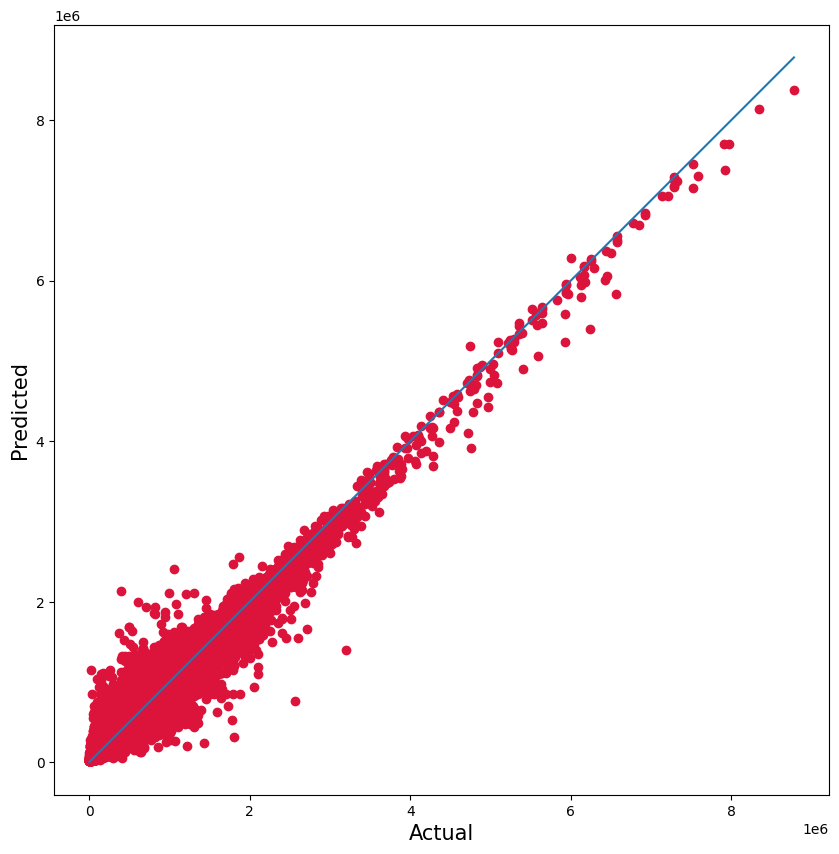

In [127]:
plt.figure(figsize=(10,10))
plt.scatter(X_test_copy['Actual'], X_test_copy['Predicted'], c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(X_test_copy['Predicted']), max(X_test_copy['Actual']))
p2 = min(min(X_test_copy['Predicted']), min(X_test_copy['Actual']))
plt.plot([p1, p2], [p1, p2])
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.show()

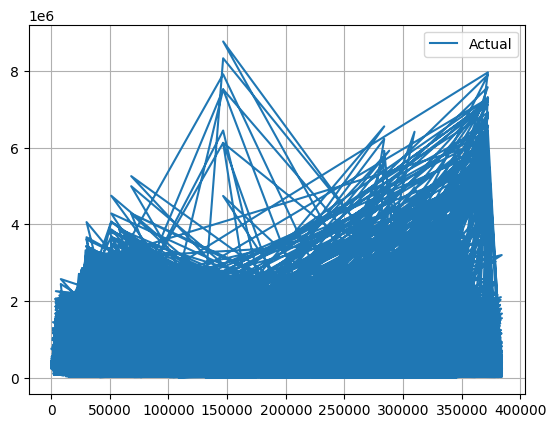

In [128]:
plt.plot(X_test_copy['Actual'],label='Actual')
#plt.plot(X_test_copy['Predicted'],label='Predicted')
plt.legend()
plt.grid()
plt.show()

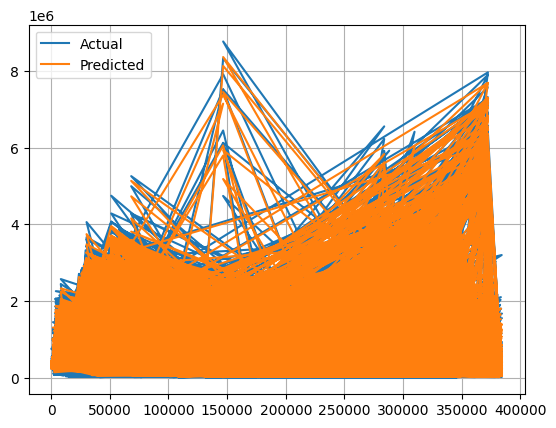

In [129]:
plt.plot(X_test_copy['Actual'],label='Actual')
plt.plot(X_test_copy['Predicted'],label='Predicted')
plt.legend()
plt.grid()
plt.show()

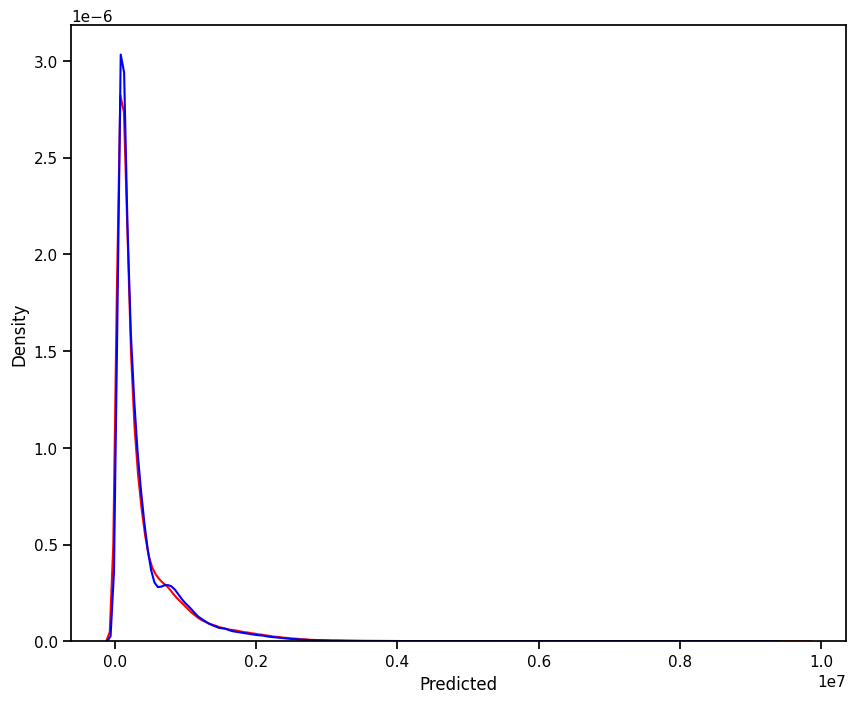

In [130]:
plt.figure(figsize=(10,8))
sns.set_context("notebook")
ax1 = sns.distplot(X_train_copy['Actual'], hist=False, color="r", label="Actual Value")
sns.distplot(X_train_copy['Predicted'], hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

In [131]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(X_train_copy['Actual'], X_train_copy['Predicted'], color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return

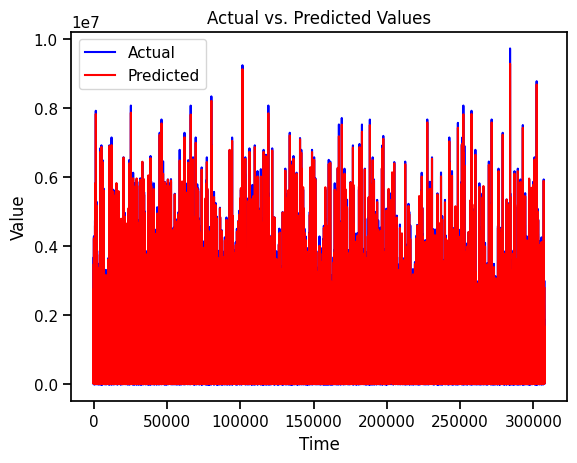

In [132]:
import matplotlib.pyplot as plt


# X-axis values (e.g., time periods)
x = range(1, len(X_train_copy['Actual']) + 1)

# Create a new figure and axes
fig, ax = plt.subplots()

# Plot the actual values as a blue line
ax.plot(x, X_train_copy['Actual'], color='blue', label='Actual')

# Plot the predicted values as a red line
ax.plot(x, X_train_copy['Predicted'], color='red', label='Predicted')

# Set the x-axis labels
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Value')

# Set the title of the chart
ax.set_title('Actual vs. Predicted Values')

# Add a legend
ax.legend()

# Display the chart
plt.show()


In [133]:
X_test_copy=X_test.copy()
X_test_copy['Predicted']=y_pred
X_test_copy['Actual']=y_test


In [134]:
y_pred

array([  45415.58, 2071209.4 ,  100208.82, ...,   28201.47,  198344.03,
        401337.5 ], dtype=float32)

In [135]:
y_test

,SOLDAMOUNT
237224,20000
66769,2056603
270532,130000
89107,1317221
175362,90000
...,...
347926,308005
205051,160000
246714,20000
35721,160000
